# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables

#os.chdir("/home/oem/Fintech_0/class_repo/python-homework-repo/python-homework/HW5_Financial_Planning")
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# load the monte carlo simulation class
## os.chdir("/home/oodaye/Fintech/class_repo/python-homework-repo/python-homework/HW5_Financial_Planning")
from MCForecastTools import MCSimulation



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

#%% Fetch current BTC price
my_btc_res = requests.get(btc_url)

dt = my_btc_res.json()

my_btc_value = dt['data']['1']['quotes']['USD']['price']
print(my_btc_value)

#%% Fetch current ETH price
my_eth_res = requests.get(eth_url)

dt1 = my_eth_res.json()

my_eth_value = dt1['data']['1027']['quotes']['USD']['price']
print(my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

60138.0
4018.83
The current value of your 1.2 BTC is $60138.00
The current value of your 5.3 ETH is $4018.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
#%% portfolio shares 

my_agg = 200 
my_spy = 50 

In [7]:
# Set Alpaca API key and secret
# create the Alpaca API object 

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key, 
    api_version='v2')

# Format current date as ISO format -- make sure it is a weekday
today = pd.Timestamp("2021-07-09", tz="America/New_York").isoformat()

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!


tickers = ["AGG", "SPY"]

# set the time frame
timeframe = "1D"

## get the current closing prices and convert to a dataframe 
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe, 
    start = today, 
    end = today  
).df

print(df_portfolio)

                               AGG                                      SPY  \
                              open    high     low   close   volume    open   
time                                                                          
2021-07-09 00:00:00-04:00  115.735  115.76  115.69  115.69  4602694  432.53   

                                                              
                             high      low   close    volume  
time                                                          
2021-07-09 00:00:00-04:00  435.84  430.714  435.48  59254094  


In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

shares = agg_close_price + spy_close_price 


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.69
Current SPY closing price: $435.48


In [10]:
# Compute the current value of shares
my_spy_value =agg_close_price * my_agg
my_agg_value = spy_close_price * my_spy

crypto = my_btc_value + my_eth_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23138.00
The current value of your 200 AGG shares is $21774.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!

# Create savings DataFrame
monthly_income = 1200 
 
df_savings = pd.DataFrame(np.array([[crypto], [shares]]),
                   columns=['amount'], index=['crypto','shares'])
 
print(df_savings)
# Display savings DataFrame
display(df_savings)

          amount
crypto  64156.83
shares    551.17


,amount
crypto,64156.83
shares,551.17


array([<AxesSubplot:ylabel='amount'>], dtype=object)

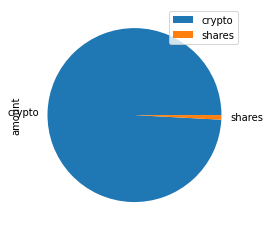

In [12]:
# Plot savings pie chart
 
df_savings.plot(kind='pie', subplots = True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

## calculate total amount of savings 
total_savings = df_savings.sum()

if total_savings[0] > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Not enough money!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-22', tz='America/New_York').isoformat()

In [15]:
NY = 'America/New_York'
start=pd.Timestamp('2015-08-01', tz=NY).isoformat()
end=pd.Timestamp('2020-08-30', tz=NY).isoformat()
print(alpaca.get_barset(['AAPL', 'GOOG'], 'day', start=start, end=end).df)

                               AAPL                                       \
                               open      high      low   close    volume   
time                                                                       
2020-04-08 00:00:00-04:00  262.7400  267.3700  261.230  266.04  36519701   
2020-04-09 00:00:00-04:00  268.7000  270.0700  264.700  267.96  37508554   
2020-04-13 00:00:00-04:00  268.3100  273.7000  265.830  273.23  30530102   
2020-04-14 00:00:00-04:00  280.0000  288.2500  278.050  287.07  88126631   
2020-04-15 00:00:00-04:00  282.4000  286.3300  280.630  284.45  54896950   
...                             ...       ...      ...     ...       ...   
2020-08-24 00:00:00-04:00  514.7900  515.1400  495.745  503.79  81260572   
2020-08-25 00:00:00-04:00  498.7900  500.7172  492.210  499.31  49337045   
2020-08-26 00:00:00-04:00  504.7165  507.9700  500.330  506.19  37949023   
2020-08-27 00:00:00-04:00  508.5700  509.9400  495.330  500.04  36378278   
2020-08-28 0

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# set the time frame
timeframe = "1D"

## get the current closing prices and convert to a dataframe 
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date, 
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-11-01 00:00:00-04:00  109.17  109.4100  109.1700  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.4950  109.3310  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.4800  109.2900  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.5900  109.4600  109.54  1120425.0   
2017-11-07 00:00:00-05:00  109.58  109.6100  109.4900  109.57  1617243.0   
...                           ...       ...       ...     ...        ...   
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.49  5145953.0   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066.0   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-11-01 00:00:00-04:00     NaN      NaN     NaN     NaN         NaN  
2017-11-02 00:00:00-04:00  257.41  257.750  256.19  257.61  42432046.0  
2017-11-03 00:00:00-04:00  257.78  258.500  257.30  258.44  38008582.0  
2017-11-06 00:00:00-05:00  258.29  259.000  258.22  258.82  22683758.0  
2017-11-07 00:00:00-05:00  258.97  259.350  258.09  258.70  40140309.0  
...                           ...      ...     ...     ...         ...  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22  51994387.0  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864.0  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298.0  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007.0  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701.0  

[1001 rows x 10 columns]

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
 # Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-11-01 00:00:00-04:00  109.17  109.410  109.170  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.331  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.290  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.460  109.54  1120425.0   
2017-11-07 00:00:00-05:00  109.58  109.610  109.490  109.57  1617243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-01 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-11-02 00:00:00-04:00     0.000640  257.41  257.75  256.19  257.61   
2017-11-03 00:00:00-04:00     0.000914  257.78  258.50  257.30  258.44   
2017-11-06 00:00:00-05:00     0.000731  258.29  259.00  258.22  258.82   
2017-11-07 00:00:00-05:00     0.000274  258.97  259.35  258.09  258.70   

                                                    
                               volume daily_return  
time                                                
2017-11-01 00:00:00-04:00         NaN          NaN  
2017-11-02 00:00:00-04:00  42432046.0          NaN  
2017-11-03 00:00:00-04:00  38008582.0     0.003222  
2017-11-06 00:00:00-05:00  22683758.0     0.001470  
2017-11-07 00:00:00-05:00  40140309.0    -0.000464

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/oem/Fintech_0/class_repo/python-homework-repo/python-homework/HW5_Financial_Planning/MCForecastTools.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001341,0.993754,1.003714,0.992327,1.009995,1.012341,1.000982,0.990172,1.001916,1.008433,...,1.001525,1.004936,1.011883,0.997803,1.012982,0.991675,1.000015,0.999595,1.008533,0.999233
2,1.009810,0.999018,1.007797,0.996000,1.008126,1.012596,1.001326,0.990997,1.005081,1.009719,...,0.996751,1.001065,1.006483,1.000879,1.019761,1.002721,1.011626,1.002706,1.013433,0.997199
3,1.003675,1.012331,1.004299,1.008531,1.012394,1.013359,0.996705,0.999720,1.007561,1.013015,...,1.003483,1.003645,1.007113,1.006618,1.025632,1.002507,1.015489,1.007726,1.003751,1.001281
4,1.003762,1.012550,1.016409,1.010803,1.018891,1.018424,0.999425,1.005675,1.002291,1.008239,...,1.012596,1.006003,1.018257,1.009200,1.025457,1.015843,1.020130,1.011176,1.002041,0.996333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.800325,9.489446,8.213738,4.966298,12.242495,7.013565,7.371878,6.253147,4.373178,7.601609,...,9.454254,4.728713,9.169895,6.560248,5.406039,6.183436,8.330184,11.236814,9.705914,10.141140
7557,6.802944,9.493203,8.200160,4.996448,12.238006,7.036870,7.367153,6.250026,4.386502,7.650024,...,9.442508,4.709132,9.235474,6.582692,5.431792,6.192260,8.386553,11.220171,9.785853,10.001824
7558,6.823127,9.607060,8.198867,5.030045,12.209409,7.056181,7.351753,6.350708,4.409499,7.645117,...,9.589635,4.701592,9.162261,6.647455,5.395071,6.195495,8.463455,11.259335,9.752139,10.077226
7559,6.877312,9.535608,8.209648,5.063628,12.272526,7.035873,7.323362,6.318851,4.417323,7.599096,...,9.605925,4.723697,9.118947,6.590354,5.373164,6.256712,8.395234,11.353497,9.997831,10.148035


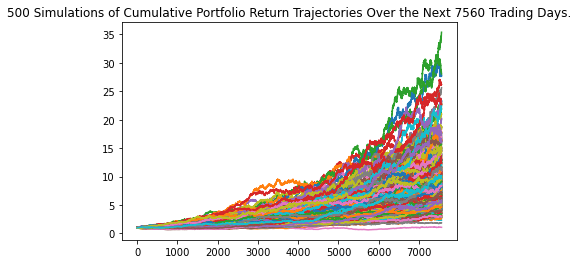

In [20]:
# Plot simulation outcomes
 # Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

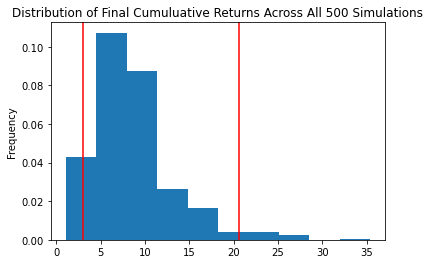

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              8.589076
std               4.478153
min               1.079618
25%               5.430598
50%               7.727854
75%              10.334873
max              35.393082
95% CI Lower      3.071536
95% CI Upper     20.634705
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61430.71 and $412694.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $92146.07 and $619041.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-11-01 00:00:00-04:00  109.17  109.410  109.170  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.331  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.290  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.460  109.54  1120425.0   
2017-11-07 00:00:00-05:00  109.58  109.610  109.490  109.57  1617243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-01 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-11-02 00:00:00-04:00     0.000640  257.41  257.75  256.19  257.61   
2017-11-03 00:00:00-04:00     0.000914  257.78  258.50  257.30  258.44   
2017-11-06 00:00:00-05:00     0.000731  258.29  259.00  258.22  258.82   
2017-11-07 00:00:00-05:00     0.000274  258.97  259.35  258.09  258.70   

                                                    
                               volume daily_return  
time                                                
2017-11-01 00:00:00-04:00         NaN          NaN  
2017-11-02 00:00:00-04:00  42432046.0          NaN  
2017-11-03 00:00:00-04:00  38008582.0     0.003222  
2017-11-06 00:00:00-05:00  22683758.0     0.001470  
2017-11-07 00:00:00-05:00  40140309.0    -0.000464

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/oem/Fintech_0/class_repo/python-homework-repo/python-homework/HW5_Financial_Planning/MCForecastTools.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004594,0.996725,0.997141,1.000724,0.995824,0.998161,0.997762,1.007255,0.998896,1.003772,...,1.012593,1.008802,0.995123,0.994873,0.998086,0.993010,0.997926,1.003583,0.994403,0.994515
2,1.006344,1.008185,0.994336,1.001019,1.002887,0.991476,0.999210,1.013771,1.006749,1.000313,...,1.008144,1.016831,0.990793,0.994286,1.000122,0.993099,1.010946,1.012234,0.994031,1.003258
3,1.012139,1.008805,0.985284,1.011410,0.999869,1.005190,1.007690,1.014027,1.013793,1.004891,...,1.013192,1.016803,0.987702,0.998867,1.005354,0.994151,1.011663,1.000126,0.983343,1.008263
4,1.015970,1.017875,0.983674,1.014947,0.998702,1.001113,1.006472,1.018149,1.012981,1.005587,...,1.009309,1.014586,0.987111,0.995193,1.012101,0.995611,1.008947,1.009621,0.984293,1.004500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.257380,1.696005,1.077138,1.911811,1.637927,1.330547,1.396095,1.217797,0.874021,2.466665,...,1.333261,1.732933,1.365065,0.998439,1.716963,1.150844,1.113386,1.292309,1.121923,1.124708
1257,1.261879,1.684311,1.071599,1.917770,1.641515,1.346556,1.393966,1.227280,0.875773,2.488158,...,1.327902,1.730685,1.377553,1.002127,1.732990,1.147386,1.106630,1.283751,1.119896,1.122640
1258,1.248148,1.674518,1.075441,1.930684,1.644952,1.349985,1.400718,1.224681,0.878634,2.471707,...,1.306590,1.724096,1.377573,0.992935,1.731958,1.158500,1.099926,1.276171,1.125878,1.127173
1259,1.263539,1.678818,1.082495,1.934528,1.654201,1.337419,1.399721,1.216356,0.882308,2.449249,...,1.307173,1.720379,1.371185,0.989966,1.727295,1.160298,1.099389,1.282575,1.129420,1.131239


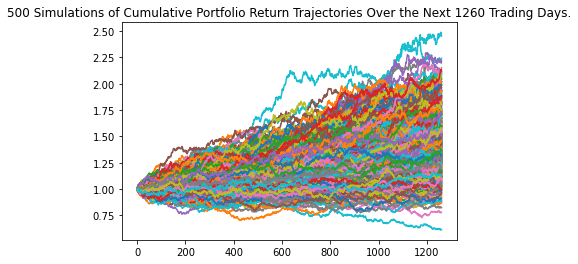

In [27]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

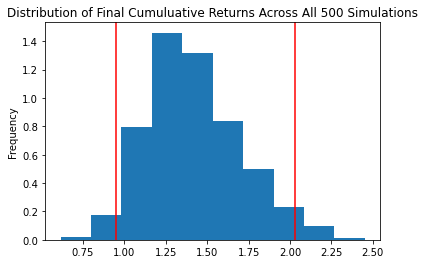

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.422831
std               0.281266
min               0.615633
25%               1.228867
50%               1.388020
75%               1.603843
max               2.451641
95% CI Lower      0.949097
95% CI Upper      2.031917
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)




# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56945.84 and $121915.02


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_tenyear.portfolio_data.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-11-01 00:00:00-04:00  109.17  109.410  109.170  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.331  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.290  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.460  109.54  1120425.0   
2017-11-07 00:00:00-05:00  109.58  109.610  109.490  109.57  1617243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-01 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-11-02 00:00:00-04:00     0.000640  257.41  257.75  256.19  257.61   
2017-11-03 00:00:00-04:00     0.000914  257.78  258.50  257.30  258.44   
2017-11-06 00:00:00-05:00     0.000731  258.29  259.00  258.22  258.82   
2017-11-07 00:00:00-05:00     0.000274  258.97  259.35  258.09  258.70   

                                                    
                               volume daily_return  
time                                                
2017-11-01 00:00:00-04:00         NaN          NaN  
2017-11-02 00:00:00-04:00  42432046.0          NaN  
2017-11-03 00:00:00-04:00  38008582.0     0.003222  
2017-11-06 00:00:00-05:00  22683758.0     0.001470  
2017-11-07 00:00:00-05:00  40140309.0    -0.000464

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/oem/Fintech_0/class_repo/python-homework-repo/python-homework/HW5_Financial_Planning/MCForecastTools.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007320,1.002962,1.003407,1.007774,0.987027,1.002021,0.996045,1.009059,0.992452,1.005446,...,1.000080,1.000502,1.005576,1.005060,0.996283,0.994143,0.993293,1.008377,0.993972,1.003477
2,1.015454,1.003845,1.000484,1.019034,0.989475,1.001288,0.997420,1.014272,0.990999,1.009483,...,1.000060,1.008026,1.003886,1.009584,0.995609,0.996054,1.002728,1.007747,0.992112,1.011435
3,1.025437,1.007659,0.993167,1.024431,0.994069,0.990418,1.002301,1.011219,0.987665,1.005630,...,0.998878,1.006150,1.017343,1.002268,0.995794,1.001351,0.991889,1.010262,0.983752,1.012881
4,1.020814,1.005271,1.006514,1.020752,0.992634,0.982387,0.996782,1.017946,0.990980,1.017152,...,1.000979,1.016027,1.009529,1.001442,0.992594,1.005600,0.990401,1.011660,0.991465,1.011588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.842356,1.455045,1.626989,1.708459,1.386481,2.149073,2.054779,2.156678,1.956648,2.390018,...,2.373586,1.389320,2.603518,1.526317,2.969727,3.316115,2.149424,2.457811,2.300994,1.443121
2517,1.840497,1.446369,1.631131,1.706335,1.395357,2.146667,2.051062,2.153926,1.954054,2.376283,...,2.359572,1.373579,2.586782,1.528646,2.949076,3.298996,2.138294,2.460621,2.300472,1.450866
2518,1.838188,1.437137,1.633812,1.699068,1.398682,2.150604,2.053720,2.198733,1.959703,2.368395,...,2.379263,1.387548,2.588266,1.534620,2.972020,3.324133,2.152375,2.437753,2.277233,1.449619
2519,1.830681,1.440878,1.631921,1.708918,1.396570,2.136302,2.058431,2.206417,1.960417,2.367122,...,2.374353,1.393107,2.579563,1.534141,2.971423,3.315191,2.143901,2.451293,2.273681,1.437999


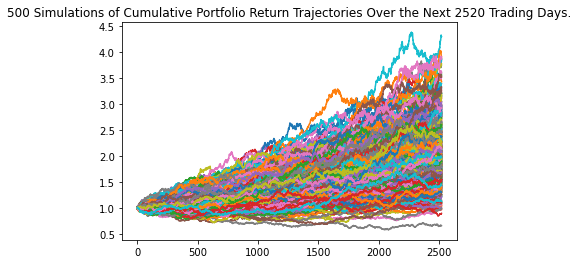

In [33]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

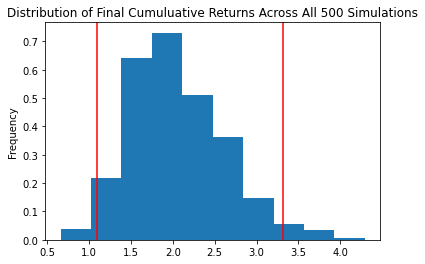

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# Print summary statistics
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.054593
std               0.571003
min               0.656614
25%               1.634947
50%               1.973458
75%               2.429608
max               4.295691
95% CI Lower      1.096020
95% CI Upper      3.315190
Name: 2520, dtype: float64


In [36]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65761.18 and $198911.42
